# importing the MNIST dataset  

In [1]:

from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False,parser='auto') #as_frame makes it load data in a numpy array and not in pandas dataframe
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y=mnist["data"],mnist["target"]
X.shape 


(70000, 784)

## looking at one image at a time

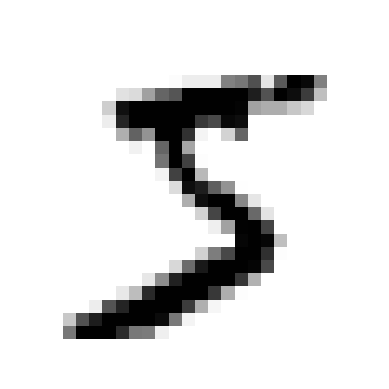

In [39]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


some_digit= X[0]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary , interpolation="nearest")
plt.axis("off")
plt.show()



In [32]:
y[0]

5

In [4]:
y=y.astype(np.uint8)
X_train,X_test,y_train,y_test=X[:6000],X[6000:],y[:6000],y[6000:]

In [5]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

from sklearn.linear_model import SGDClassifier

In [6]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [7]:
sgd_clf.predict([some_digit])

array([ True])

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
cross_val_score(sgd_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.962 , 0.956 , 0.9665])

In [10]:
from sklearn.model_selection import cross_val_predict

y_train_prepared= cross_val_predict(sgd_clf, X_train, y_train_5,cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_prepared)

array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [12]:
y_perfect=y_train_5
confusion_matrix(y_train_5, y_perfect)


array([[5486,    0],
       [   0,  514]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_train_5,y_train_prepared))
print(recall_score(y_train_5,y_train_prepared))
print(f1_score(y_train_5,y_train_prepared))

0.7801980198019802
0.7665369649805448
0.7733071638861628


In [14]:
y_score=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_score

array([  -51271.95567787,  -434778.55178673, -1014415.66793302, ...,
        -299041.95052738,  -535724.64334833,  -564278.94425332])

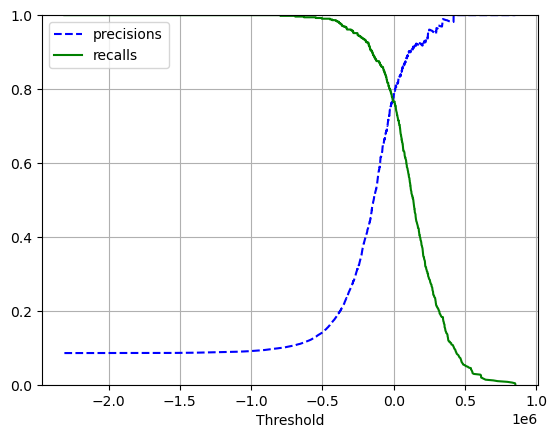

In [15]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_score)

def graph(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1] , "b--", label="precisions")
    plt.plot(thresholds,recalls[:-1] , "g-", label="recalls")
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylim(0,1)
    plt.grid()

graph(precisions,recalls,thresholds)

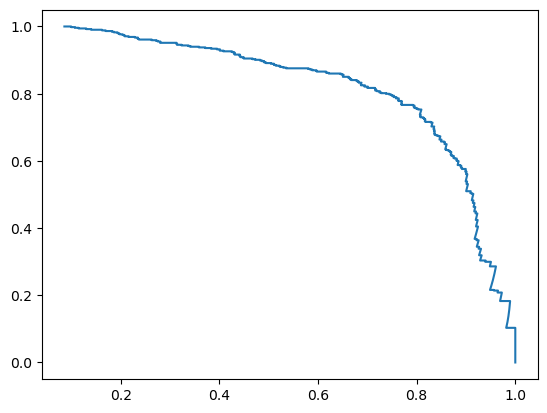

In [16]:
plt.plot(precisions,recalls)

In [17]:
#to find the threshold where you get maximum precision

threshold_90_per=thresholds[np.argmax(precisions>=0.90)]
threshold_90_per

105660.23702487024

In [18]:
y_train_pread_90=(y_score>=threshold_90_per)
precision_score(y_train_5,y_train_pread_90)


0.9012345679012346

In [19]:
recall_score(y_train_5,y_train_pread_90)

0.5680933852140078

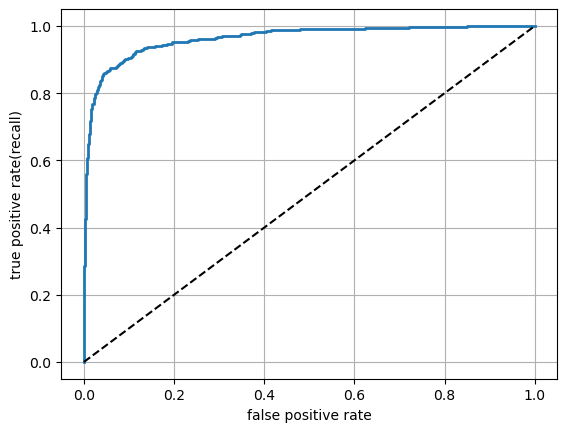

In [20]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,y_score)

def graph1(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.grid()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate(recall)')

graph1(fpr,tpr)
    

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_score)

0.9641599203348885

In [22]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8705, 0.8985, 0.8925])

# multi valued classifier

In [27]:
sgd_clf.fit(X_train_scaled,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

# error analysis


In [29]:
y_train_prepared=cross_val_predict(sgd_clf, X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_prepared)
conf_mx

array([[572,   0,   1,   2,   1,   9,   3,   1,   3,   0],
       [  0, 637,   6,   3,   1,   5,   0,   1,  16,   2],
       [ 10,  12, 493,  11,  10,   4,  10,   9,  20,   2],
       [  3,   5,  21, 514,   1,  35,   1,   7,  11,  10],
       [  3,   2,   7,   0, 556,   2,  10,   8,   9,  26],
       [  5,   6,   5,  24,  14, 411,  10,   1,  25,  13],
       [  4,   4,   6,   0,   5,   6, 577,   1,   5,   0],
       [  3,   4,   7,   2,   9,   0,   1, 577,   3,  45],
       [  2,  19,  13,  16,   4,  10,   6,   3, 464,  14],
       [  7,   4,   5,   7,  15,   3,   0,  27,  11, 522]], dtype=int64)

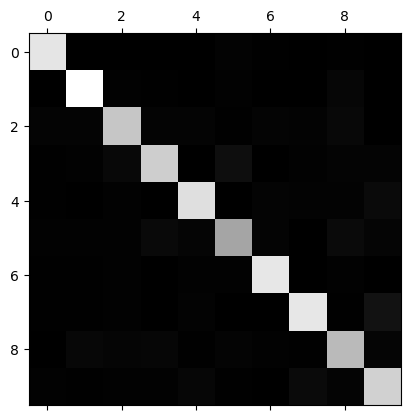

In [30]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

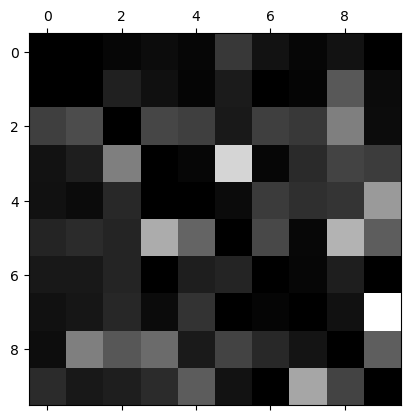

In [31]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [40]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

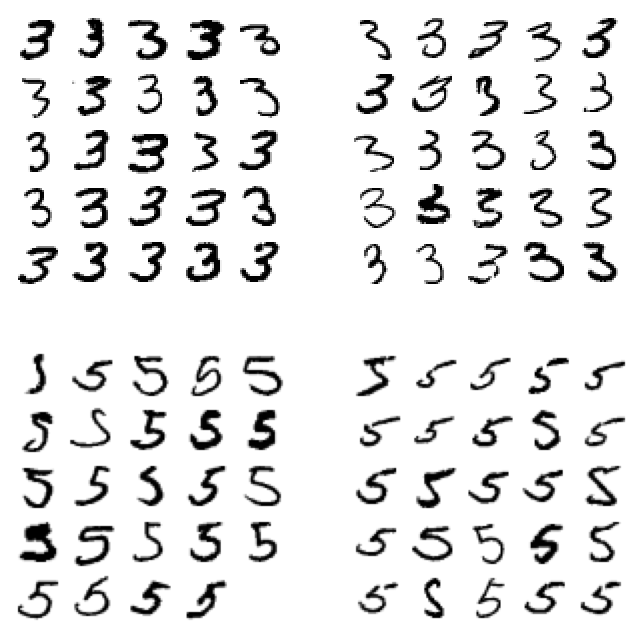

In [41]:
cl_a,cl_b=3,5

X_aa=X_train[(y_train==cl_a) & (y_train_prepared==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_prepared==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_prepared==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_prepared==cl_b)]

plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25],images_per_row=5)
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [47]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [49]:
f1_score(y_multilabel,y_train_knn_pred,average="weighted")

0.9529944300252725